In [ ]:
from pennystockpipeline.PennyStockData import PennyStockData
import numpy as np
import pandas as pd
from time import gmtime, strftime
from datetime import datetime

## Testing
table_name = "all_historical_modified"
database_name_with_path = "mod_historicaldata.db"

#print(database_name_with_path)
#print(database_name_with_path.strip())

psd_imputed = PennyStockData(database_name_with_path, table_name, impute=True, verbose=2)
psd_unimputed = PennyStockData(database_name_with_path, table_name, impute=False, verbose=2)

tickers = psd_imputed.tickers

print(len(psd_imputed.data))
print(len(psd_unimputed.data))


In [8]:
data_imputed = psd_imputed.data
df_imputed = pd.DataFrame(data_imputed, columns=psd_imputed.headers)
df_imputed.head()

,ticker_id,ticker,p_date,p_time,volume_weighted_average,open,close,high,low,time,volume,number_of_trades,time-diff
0,1,ACHR,2022-07-12,16:30,3.0307,3.0301,3.030,3.0301,3.0300,1657643400,269.0,4,0.0
1,1,ACHR,2022-07-12,16:35,3.0362,3.0400,3.040,3.0400,3.0350,1657643700,2037.0,35,5.0
2,1,ACHR,2022-07-12,16:40,3.0364,3.0400,3.035,3.0400,3.0350,1657644000,796.0,17,5.0
3,1,ACHR,2022-07-12,16:45,3.0356,3.0350,3.035,3.0400,3.0350,1657644300,1795.0,19,5.0
4,1,ACHR,2022-07-12,16:50,3.0286,3.0350,3.025,3.0350,3.0212,1657644600,10397.0,87,5.0


In [9]:
data_unimputed = psd_unimputed.data
df_unimputed = pd.DataFrame(data_unimputed, columns=psd_unimputed.headers)
df_unimputed.head()

,ticker_id,ticker,p_date,p_time,volume_weighted_average,open,close,high,low,time,volume,number_of_trades
0,1,ACHR,2022-07-12,16:30,3.0307,3.0301,3.030,3.0301,3.0300,1657643400,269.0,4
1,1,ACHR,2022-07-12,16:35,3.0362,3.0400,3.040,3.0400,3.0350,1657643700,2037.0,35
2,1,ACHR,2022-07-12,16:40,3.0364,3.0400,3.035,3.0400,3.0350,1657644000,796.0,17
3,1,ACHR,2022-07-12,16:45,3.0356,3.0350,3.035,3.0400,3.0350,1657644300,1795.0,19
4,1,ACHR,2022-07-12,16:50,3.0286,3.0350,3.025,3.0350,3.0212,1657644600,10397.0,87


In [ ]:
'''
from time import gmtime, strftime 
x = ((int)(1657643400)) + 300
strftime("%H:%M", gmtime(x))
'''
#print((int)(((int)(data[row_index+1][9]) - (int)(data[row_index][9]))/(60)))

In [ ]:
#p = psd.data
#p[0].append("nc")
#print (p[0])

#time_diff = 0
#data[0].append(time_diff)
#imputed_data = list()
#imputed_data.append(data[0])

#print(imputed_data)

In [ ]:
#copied_record_from_previous_row = data[5].copy()
#copied_record_from_previous_row.append(5.)
#print(copied_record_from_previous_row)

#copied_record_from_previous_row = None
#copied_record_from_previous_row = data[7].copy()

#print(copied_record_from_previous_row)

In [ ]:
## IMPUTE CODE -- ALREADY IMPUTED
'''
data = psd.data
no_of_records = len(data)
total_imputed = 0
# First row
time_diff = 0
data[0].append(time_diff)
imputed_data = list()
imputed_data.append(data[0])
headers = psd.headers

for row_index in range(no_of_records-1):
    if (data[row_index][0] == data[row_index+1][0] and data[row_index][2] == data[row_index+1][2]):
        time_diff = (int)(((int)(data[row_index+1][9]) - (int)(data[row_index][9]))/(60))  # in mins
    else:
        time_diff = 0
    
    # IMPUTE
    if (time_diff > 5):
        rows_to_impute = (int)((time_diff - 5) / 5)
        imputed_cursor = 1

        final_row = data[row_index+1].copy()
        final_row.append(5.)
        
        for o in range(rows_to_impute):
            ## we need to insert this copied_record_from_previous_row after data[row_index]
            copied_record_from_previous_row = None
            copied_record_from_previous_row = data[row_index].copy()
            copied_record_from_previous_row.append(5.)
            copied_record_from_previous_row[10] = 0
            copied_record_from_previous_row[11] = 0
            copied_record_from_previous_row[9] = (int)(copied_record_from_previous_row[9]) + (300 * imputed_cursor) ## add 5 mins
            copied_record_from_previous_row[3] = strftime("%H:%M", gmtime(((int)(copied_record_from_previous_row[9]))))
            imputed_data.append(copied_record_from_previous_row)
            
            copied_record_from_previous_row = None
            imputed_cursor = imputed_cursor + 1
            
        imputed_data.append(final_row)
        total_imputed = total_imputed + rows_to_impute  
    else:
        copied_record_from_previous_row = data[row_index+1].copy()
        copied_record_from_previous_row.append(time_diff)
        imputed_data.append(copied_record_from_previous_row)
    
headers.append('time-diff')

print(no_of_records, len(imputed_data), total_imputed)
'''

In [ ]:
#psd.headers.append('time-diff')

#print(imputed_data[0])
#print(imputed_data[1])


In [ ]:
#df1 = pd.DataFrame(psd.data, columns=psd.headers)
#df1.head()

In [ ]:
#df1['time-diff'].unique()

In [ ]:
df_imputed.to_csv("imputed_data.csv")

In [ ]:
df_unimputed.to_csv("unimputed_data.csv")

In [10]:
imputed_ds = np.array(psd_imputed.data)
imputed_dataset = imputed_ds[:,0:5]
imputed_dataset = np.delete(imputed_dataset, 3, 1) # dropping time column, delete 3rd parameter = axis and 2nd parameter = index starting at 0
imputed_dataset = np.delete(imputed_dataset, 1, 1) # dropping ticker column, delete 3rd parameter = axis and 2nd parameter = index starting at 0
print(imputed_dataset[0])



['1' '2022-07-12' '3.0307']


In [11]:
unimputed_ds = np.array(psd_unimputed.data)
unimputed_dataset = unimputed_ds[:,0:5]
unimputed_dataset = np.delete(unimputed_dataset, 3, 1) # dropping time column, delete 3rd parameter = axis and 2nd parameter = index starting at 0
unimputed_dataset = np.delete(unimputed_dataset, 1, 1) # dropping ticker column, delete 3rd parameter = axis and 2nd parameter = index starting at 0
print(unimputed_dataset[0])



['1' '2022-07-12' '3.0307']


In [12]:
#from datetime import datetime, date
df2_imputed = pd.DataFrame(imputed_dataset, columns=["ticker_id", "date", "vwa"])
df2_imputed['ticker_id'] = df2_imputed['ticker_id'].astype(int)
df2_imputed['date'] = pd.to_datetime(df2_imputed['date'])
df2_imputed['vwa'] = df2_imputed['vwa'].astype(float)
df2_imputed.head()

,ticker_id,date,vwa
0,1,2022-07-12,3.0307
1,1,2022-07-12,3.0362
2,1,2022-07-12,3.0364
3,1,2022-07-12,3.0356
4,1,2022-07-12,3.0286


In [13]:
#from datetime import datetime, date
df2_unimputed = pd.DataFrame(unimputed_dataset, columns=["ticker_id", "date", "vwa"])
df2_unimputed['ticker_id'] = df2_unimputed['ticker_id'].astype(int)
df2_unimputed['date'] = pd.to_datetime(df2_unimputed['date'])
df2_unimputed['vwa'] = df2_unimputed['vwa'].astype(float)
df2_unimputed.head()

,ticker_id,date,vwa
0,1,2022-07-12,3.0307
1,1,2022-07-12,3.0362
2,1,2022-07-12,3.0364
3,1,2022-07-12,3.0356
4,1,2022-07-12,3.0286


In [14]:
# normalized features (close, volume) table for training
normalized_imputed_data = pd.DataFrame()

# First we normalize by each ticker as tickerwise, the wva differs a lot
data_by_ticker = {}
#x = np.array((len(dataset), 1))
#start = 0
for ticker in df2_imputed['ticker_id'].unique():
    data_by_ticker[ticker] = df2_imputed[df2_imputed['ticker_id'] == ticker].copy()
    data_by_ticker[ticker]['vwa_norm'] = (data_by_ticker[ticker]['vwa'] / data_by_ticker[ticker]['vwa'].max())
    
for key in data_by_ticker:
    # create a temporary DataFrame to hold the current data
    temp_df = pd.DataFrame({
        'vwa_norm': data_by_ticker[key]['vwa_norm']
    })
    
    # concatenate the temporary DataFrame to the normalized_data DataFrame
    normalized_imputed_data = pd.concat([normalized_imputed_data, temp_df], ignore_index=True)

# optionally, you can reset the index if needed
normalized_imputed_data.reset_index(drop=True, inplace=True)
df2_imputed = pd.concat([df2_imputed, normalized_imputed_data], axis=1, join='inner')
df2_imputed.reset_index(drop=True, inplace=True)

df2_imputed.head()


,ticker_id,date,vwa,vwa_norm
0,1,2022-07-12,3.0307,0.389675
1,1,2022-07-12,3.0362,0.390383
2,1,2022-07-12,3.0364,0.390408
3,1,2022-07-12,3.0356,0.390305
4,1,2022-07-12,3.0286,0.389405


In [15]:
# normalized features (close, volume) table for training
normalized_unimputed_data = pd.DataFrame()

# First we normalize by each ticker as tickerwise, the wva differs a lot
data_by_ticker = {}
#x = np.array((len(dataset), 1))
#start = 0
for ticker in df2_unimputed['ticker_id'].unique():
    data_by_ticker[ticker] = df2_unimputed[df2_unimputed['ticker_id'] == ticker].copy()
    data_by_ticker[ticker]['vwa_norm'] = (data_by_ticker[ticker]['vwa'] / data_by_ticker[ticker]['vwa'].max())
    
for key in data_by_ticker:
    # create a temporary DataFrame to hold the current data
    temp_df = pd.DataFrame({
        'vwa_norm': data_by_ticker[key]['vwa_norm']
    })
    
    # concatenate the temporary DataFrame to the normalized_data DataFrame
    normalized_unimputed_data = pd.concat([normalized_unimputed_data, temp_df], ignore_index=True)

# optionally, you can reset the index if needed
normalized_unimputed_data.reset_index(drop=True, inplace=True)
df2_unimputed = pd.concat([df2_unimputed, normalized_unimputed_data], axis=1, join='inner')
df2_unimputed.reset_index(drop=True, inplace=True)

df2_unimputed.head()


,ticker_id,date,vwa,vwa_norm
0,1,2022-07-12,3.0307,0.389675
1,1,2022-07-12,3.0362,0.390383
2,1,2022-07-12,3.0364,0.390408
3,1,2022-07-12,3.0356,0.390305
4,1,2022-07-12,3.0286,0.389405


In [16]:
# Using the column 'time' (millisecond) add a new column 'dates' with datetime
dates_imputed = df2_imputed['date']
tickers_imputed = df2_imputed['ticker_id']
vwa_norm_imputed = df2_imputed['vwa_norm']

dates_unimputed = df2_unimputed['date']
tickers_unimputed = df2_unimputed['ticker_id']
vwa_norm_unimputed = df2_unimputed['vwa_norm']

#print(tickers)
#print(vwa_norm)
#dates = dates.dt.tz_localize('UTC').dt.tz_convert('US/Pacific')
#dates = dates.dt.tz_localize(None)

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
# Select features to use
#features = df1[['volume', 'volume_weighted_average', 'open', 'close', 'high', 'low']].values
#print("ACHR")
#for f in range(50):
#    print(features[f])
#print("AXXA")
#for g in range(554627, 554627+50):
#    print(features[g])

#print("Normalized")
# Normalize features
#scaler = MinMaxScaler(feature_range=(0, 1))
#scaled_features = scaler.fit_transform(features)
#print("ACHR")
#for f in range(50):
#    print(scaled_features[f])
#print("AXXA")
#for g in range(554627, 554627+50):
#    print(scaled_features[g])
#print(len(vwa_norm))
#print(len(dates))
#print(len(tickers))

In [17]:
vwa_norm_imputed = np.array(vwa_norm_imputed)
vwa_norm_imputed = np.reshape(vwa_norm_imputed, (-1,1))

print(vwa_norm_imputed.shape)

print(vwa_norm_imputed[0:5])

vwa_norm_unimputed = np.array(vwa_norm_unimputed)
vwa_norm_unimputed = np.reshape(vwa_norm_unimputed, (-1,1))

print(vwa_norm_unimputed.shape)

print(vwa_norm_unimputed[0:5])

(965760, 1)
[[0.38967535]
 [0.39038251]
 [0.39040823]
 [0.39030537]
 [0.38940534]]
(549609, 1)
[[0.38967535]
 [0.39038251]
 [0.39040823]
 [0.39030537]
 [0.38940534]]


In [20]:
import torch # Library for implementing Deep Neural Network 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [21]:
def create_sequences(data, sequence_length, prediction_length, dates, tickers):
    xs, ys = [], []
    index = 0
    count = 0
    while index < len(data) - sequence_length - prediction_length + 1:
        # Check if sequence is within a single day
        if dates[index].date() == dates[index + sequence_length].date() and tickers[index] == tickers[index + sequence_length]:
            # If day == 2024-05-31, print
            # if dates[index] == "2024-05-31":
            # print("We got a sequence from", dates[index], "to", dates[index + sequence_length], "sequence-length is", (index + sequence_length) -index, tickers[index], tickers[index + sequence_length])
            xs.append(data[index:index + sequence_length])
            ys.append(data[index + sequence_length:index + sequence_length + prediction_length])
            index += sequence_length
            count += 1
        else:  # Move index to the start of the next day
            newindex = index
            while dates[newindex].date() == dates[newindex + 1].date():
                newindex += 1
            newindex += 1
            index = newindex
    print("Valid days:", count)
    return np.array(xs), np.array(ys)


from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

vwa_norm_imputed = scaler.fit_transform(vwa_norm_imputed)
vwa_norm_unimputed = scaler.fit_transform(vwa_norm_unimputed)

# One day sequence lenght
sequence_length = 78
prediction_length = 78

xi, yi = create_sequences(vwa_norm_imputed, sequence_length, prediction_length, dates_imputed, tickers_imputed)
xu, yu = create_sequences(vwa_norm_unimputed, sequence_length, prediction_length, dates_unimputed, tickers_unimputed)

# Split data into train and test sets
itrain_size = int(len(xi) * 0.8)
xi_train, xi_test = xi[:itrain_size], xi[itrain_size:]
yi_train, yi_test = yi[:itrain_size], yi[itrain_size:]

print("xi_train shape:", xi_train.shape)
print("yi_train shape:", yi_train.shape)
print("xi_test shape:", xi_test.shape)
print("yi_test shape:", yi_test.shape)

xi_train = torch.tensor(xi_train, dtype=torch.float32)
yi_train = torch.tensor(yi_train, dtype=torch.float32)
print(xi_train.shape, yi_train.shape)

xi_test = torch.tensor(xi_test, dtype=torch.float32)
yi_test = torch.tensor(yi_test, dtype=torch.float32)
print(xi_test.shape, yi_test.shape)

# Split data into train and test sets
utrain_size = int(len(xu) * 0.8)
xu_train, xu_test = xu[:utrain_size], xu[utrain_size:]
yu_train, yu_test = yu[:utrain_size], yu[utrain_size:]

print("xu_train shape:", xu_train.shape)
print("yu_train shape:", yu_train.shape)
print("xu_test shape:", xu_test.shape)
print("yu_test shape:", yu_test.shape)

xu_train = torch.tensor(xu_train, dtype=torch.float32)
yu_train = torch.tensor(yu_train, dtype=torch.float32)
print(xu_train.shape, yu_train.shape)

xu_test = torch.tensor(xu_test, dtype=torch.float32)
yu_test = torch.tensor(yu_test, dtype=torch.float32)
print(xu_test.shape, yu_test.shape)

Valid days: 4430
Valid days: 1055
xi_train shape: (3544, 78, 1)
yi_train shape: (3544, 78, 1)
xi_test shape: (886, 78, 1)
yi_test shape: (886, 78, 1)
torch.Size([3544, 78, 1]) torch.Size([3544, 78, 1])
torch.Size([886, 78, 1]) torch.Size([886, 78, 1])
xu_train shape: (844, 78, 1)
yu_train shape: (844, 78, 1)
xu_test shape: (211, 78, 1)
yu_test shape: (211, 78, 1)
torch.Size([844, 78, 1]) torch.Size([844, 78, 1])
torch.Size([211, 78, 1]) torch.Size([211, 78, 1])


In [22]:

class LSTMModel(nn.Module):
    # input_size : number of features in input at each time step
    # hidden_size : Number of LSTM units 
    # num_layers : number of LSTM layers 
    def __init__(self, input_size, hidden_size, num_layers): 
        super(LSTMModel, self).__init__() #initializes the parent class nn.Module
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.linear = nn.Linear(hidden_size, 1)

    def forward(self, x): # defines forward pass of the neural network
        out, _ = self.lstm(x)
        out = self.linear(out)
        return out

# Build LSTM model
#model = LSTMModel()
#model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, x_train.shape[2])))
#model.add(LSTM(50))
#model.add(Dense(50, activation='relu'))
#model.add(Dropout(0.2))
#model.add(Dense(prediction_length))

#model.compile(optimizer='adam', loss='mse')

# Train the model
#early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
#model.fit(x_train, y_train, epochs=100, batch_size=32, validation_split=0.1, callbacks=[early_stopping])

# Evaluate the model
#model.evaluate(x_test, y_test)

In [28]:
def train_model(model, loss_fn, optimizer, train_loader, test_loader, num_epochs):
    num_epochs = num_epochs
    train_hist =[]
    test_hist =[]
    # Training loop
    for epoch in range(num_epochs):
        total_loss = 0.0
     
        # Training
        model.train()
        for batch_x, batch_y in train_loader:
            batch_x, batch_y = batch_x.to('cpu'), batch_y.to('cpu')
            predictions = model(batch_x)
            loss = loss_fn(predictions, batch_y)
     
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
     
            total_loss += loss.item()
     
        # Calculate average training loss and accuracy
        average_loss = total_loss / len(train_loader)
        train_hist.append(average_loss)
     
        # Validation on test data
        model.eval()
        with torch.no_grad():
            total_test_loss = 0.0
     
            for batch_x_test, batch_y_test in test_loader:
                batch_x_test, batch_y_test = batch_x_test.to('cpu'), batch_y_test.to('cpu')
                predictions_test = model(batch_x_test)
                test_loss = loss_fn(predictions_test, batch_y_test)
     
                total_test_loss += test_loss.item()
     
            # Calculate average test loss and accuracy
            average_test_loss = total_test_loss / len(test_loader)
            test_hist.append(average_test_loss)
        if (epoch+1)%10==0:
            print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}')
    return model, train_hist, test_hist


In [29]:
batch_size = 16

def create_dataloaders(x_train, y_train, x_test, y_test):
    # Create DataLoader for batch training
    train_dataset = torch.utils.data.TensorDataset(x_train, y_train)
    train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True) 
    
    # Create DataLoader for batch training
    test_dataset = torch.utils.data.TensorDataset(x_test, y_test)
    test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
    
    return train_loader, test_loader

def create_model(x_train, y_train):
    input_size = 1
    num_layers = 2
    hidden_size = 64
    output_size = 1

    # Define the model, loss function, and optimizer
    model = LSTMModel(input_size, hidden_size, num_layers).to('cpu')
    loss_fn = torch.nn.MSELoss(reduction='mean')
    optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
    print(model)
    
    return model, loss_fn, optimizer

model_imputed, i_loss_fn, i_optimizer = create_model(xi_train, yi_train)
model_unimputed, u_loss_fn, u_optimizer = create_model(xu_train, yu_train)

num_epochs = 50


i_train_loader, i_test_loader = create_dataloaders(xi_train, yi_train, xi_test, yi_test)
u_train_loader, u_test_loader = create_dataloaders(xu_train, yu_train, xu_test, yu_test)

model_imputed, train_hist_i, test_hist_i = train_model(model_imputed, i_loss_fn, i_optimizer, i_train_loader, i_test_loader, num_epochs)
model_unimputed, train_hist_u, test_hist_u = train_model(model_unimputed, u_loss_fn, u_optimizer, u_train_loader, u_test_loader, num_epochs)


LSTMModel(
  (lstm): LSTM(1, 64, num_layers=2, batch_first=True)
  (linear): Linear(in_features=64, out_features=1, bias=True)
)
LSTMModel(
  (lstm): LSTM(1, 64, num_layers=2, batch_first=True)
  (linear): Linear(in_features=64, out_features=1, bias=True)
)
Epoch [10/50] - Training Loss: 0.0010, Test Loss: 0.0032
Epoch [20/50] - Training Loss: 0.0009, Test Loss: 0.0032
Epoch [30/50] - Training Loss: 0.0009, Test Loss: 0.0032
Epoch [40/50] - Training Loss: 0.0009, Test Loss: 0.0031
Epoch [50/50] - Training Loss: 0.0009, Test Loss: 0.0031
Epoch [10/50] - Training Loss: 0.0019, Test Loss: 0.0080
Epoch [20/50] - Training Loss: 0.0010, Test Loss: 0.0074
Epoch [30/50] - Training Loss: 0.0009, Test Loss: 0.0066
Epoch [40/50] - Training Loss: 0.0008, Test Loss: 0.0067
Epoch [50/50] - Training Loss: 0.0007, Test Loss: 0.0065


In [30]:
import matplotlib.pyplot as plt # Visualization 
import matplotlib.dates as mdates # Formatting dates
import seaborn as sns # Visualization

In [31]:
def plot_training_test_loss(x, train_hist, test_hist, num_epochs):
    x = np.linspace(1,num_epochs,num_epochs)
    plt.plot(x, train_hist,scalex=True, label="Training loss")
    plt.plot(x, test_hist, label="Test loss")
    plt.legend()
    plt.show()


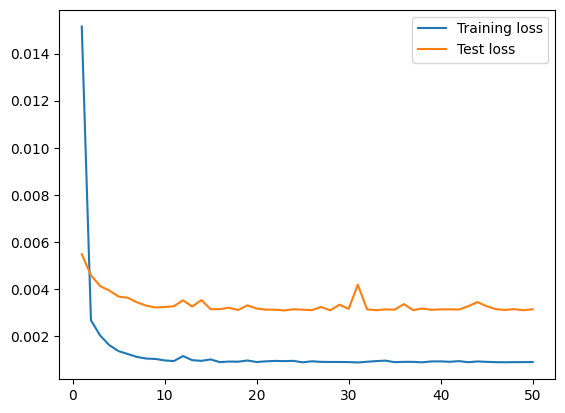

In [32]:
plot_training_test_loss(xi, train_hist_i, test_hist_i, num_epochs)



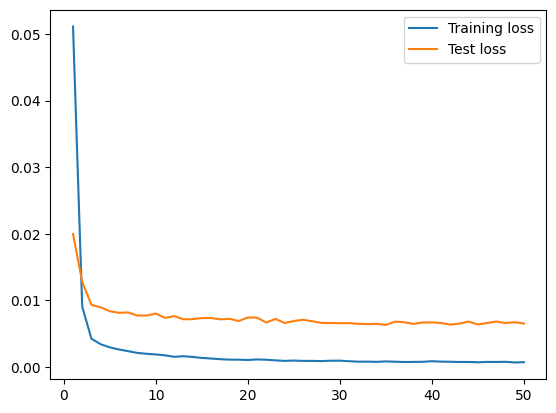

In [33]:
plot_training_test_loss(xu, train_hist_u, test_hist_u, num_epochs)

In [34]:
def forecast(model, x_test, df2):

    # Define the number of future time steps to forecast
    num_forecast_steps = 78
     
    # Convert to NumPy and remove singleton dimensions
    sequence_to_plot = x_test.squeeze().cpu().numpy()
     
    # Use the last 30 data points as the starting point
    historical_data = sequence_to_plot[-1]
    print(historical_data.shape)
     
    # Initialize a list to store the forecasted values
    forecasted_values = []
     
    # Use the trained model to forecast future values
    with torch.no_grad():
        for _ in range(num_forecast_steps*2):
            # Prepare the historical_data tensor
            historical_data_tensor = torch.as_tensor(historical_data).view(1, -1, 1).float().to('cpu')
            # Use the model to predict the next value
            predicted_value = model(historical_data_tensor).cpu().numpy()[0, 0]
     
            # Append the predicted value to the forecasted_values list
            forecasted_values.append(predicted_value[0])
     
            # Update the historical_data sequence by removing the oldest value and adding the predicted value
            historical_data = np.roll(historical_data, shift=-1)
            historical_data[-1] = predicted_value
     
             
    # Generate futute dates
    last_date = df2['date'].max()
     
    # Generate the next 30 dates
    future_dates = pd.date_range(start=last_date + pd.DateOffset(1), periods=78)
     
    # Concatenate the original index with the future dates
    combined_index = df2['date'].index.append(future_dates)

    return forecasted_values, combined_index, sequence_to_plot



In [35]:
i_forecasted_values, i_combined_index, i_sequence_to_plot = forecast(model_imputed, xi_test, df2_imputed)
u_forecasted_values, u_combined_index, u_sequence_to_plot = forecast(model_unimputed, xu_test, df2_unimputed)

(78,)


C:\Users\moham\AppData\Local\Temp\ipykernel_8492\695535151.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  historical_data[-1] = predicted_value


(78,)


C:\Users\moham\AppData\Local\Temp\ipykernel_8492\695535151.py:29: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  historical_data[-1] = predicted_value


In [36]:
def plot_forecasting(df2, sequence_to_plot, forecasted_values, combined_index):
    from sklearn.preprocessing import MinMaxScaler
    
    #set the size of the plot 
    plt.rcParams['figure.figsize'] = [14, 4] 
    
    scaler = MinMaxScaler(feature_range=(0,1))
    
    #Test data
    plt.plot(df2['date'].index[-100:-78], df2['vwa_norm'][-100:-78], label = "test_data", color = "b") 
    #reverse the scaling transformation
    original_cases = scaler.inverse_transform(np.expand_dims(sequence_to_plot[-1], axis=0)).flatten() 
    
    #the historical data used as input for forecasting
    plt.plot(df2['date'].index[-78:], original_cases, label='actual values', color='green') 
    
    #Forecasted Values 
    #reverse the scaling transformation
    forecasted_cases = scaler.inverse_transform(np.expand_dims(forecasted_values, axis=0)).flatten() 
    # plotting the forecasted values
    plt.plot(combined_index[-60:], forecasted_cases, label='forecasted values', color='red') 
    
    plt.xlabel('Time Step')
    plt.ylabel('Value')
    plt.legend()
    plt.title('Time Series Forecasting')
    plt.grid(True)


NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

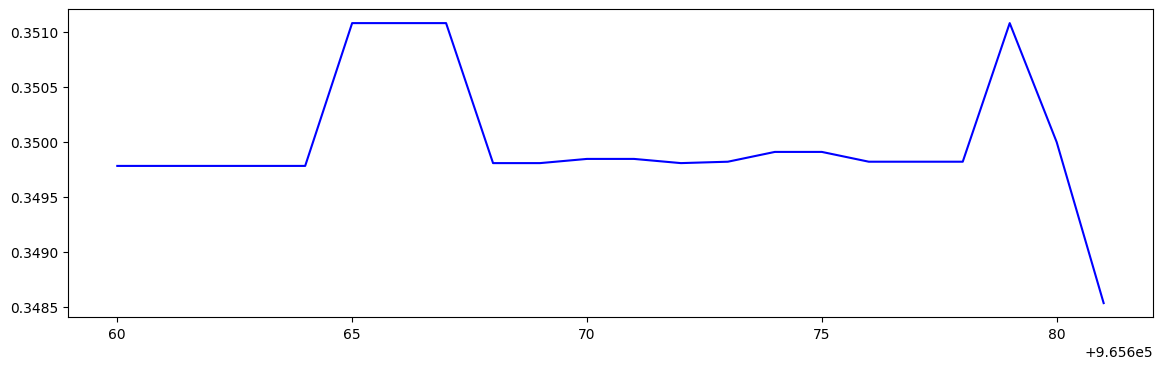

In [37]:
plot_forecasting(df2_imputed, i_sequence_to_plot, i_forecasted_values, i_combined_index)

NotFittedError: This MinMaxScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

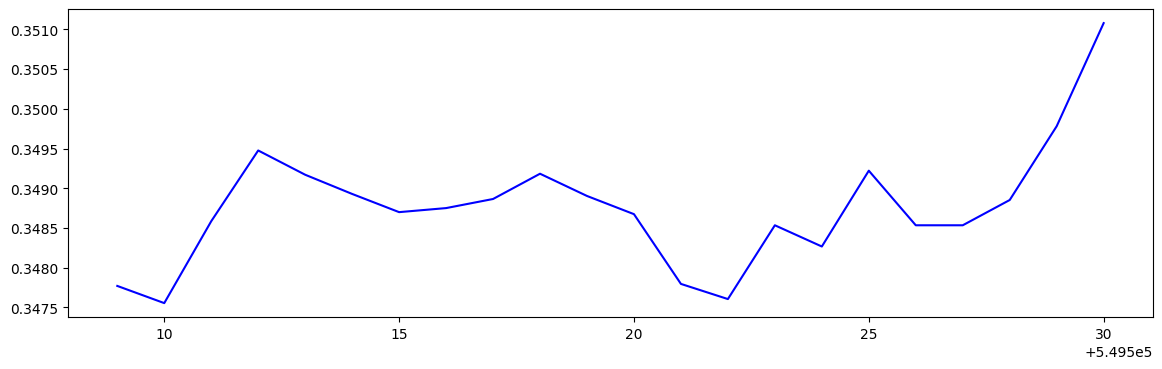

In [38]:
plot_forecasting(df2_unimputed, u_sequence_to_plot, u_forecasted_values, u_combined_index)

In [ ]:

'''
t_data = np.transpose(data)
#[print(x) for i, x in enumerate(data) if i < 5]
## The idea is to create an array such that dataset has structure [ticker_id][p_date][(col0, col1, col2, ..., coln),(col0, col1, col2, ..., coln)]
## here (col0, col1, col2, ..., coln) is the sequence data as a list of tuples from each row having 5 mins interval data 
## (refer imputing for missing data)

## Let's first get the list of tickers
tickers = np.array(psd.tickers)

#print(np.where(t_data[1] == (str)(tickers[0][0])))
#indices = np.where(t_data[1] == (str)(tickers[0][0]))
#print(data[indices])

data = np.array(psd.data)
tickers_data = {}
#print(data[:,3])
#print(data[:,1])
#sum = 0
for ticker in tickers:
    ticker_indices = np.where(t_data[1] == (str)(ticker[0]))
    ticker_data = data[ticker_indices]
    ticker_dates = np.unique(ticker_data[:,3])

    ticker_dates_data = {}
    
    for ticker_date in ticker_dates:
        ticker_date_indices = np.where(ticker_data[:,3] == (str)(ticker_date))
        ticker_date_data = data[ticker_date_indices]
        
        ticker_dates_data[ticker_date] = ticker_date_data
    tickers_data[ticker[0]] = ticker_dates_data

#print(tickers_data[2]['2022-07-12'])
    #print(tickers_dates)
    #print(len(ticker_data))
    #sum = sum + len(ticker_data)
#    print(np.where((str)(ticker[0]) in data[:,1]))
    #print(data[(str)(ticker[0]) in data[:,1]])
    #print(data[,:1] == (str)(ticker[0]))
    #print(data[0:-1])
    #ticker_data_indices = np.where(t_data[1] == (str)(ticker[0]))[0]
    #ticker_data_indices.append(np.where(t_data[1] == (str)(ticker[0]))[0])
    #print(np.array(np.where((t_data[1] == (str)(ticker[0])))))
    #ticker_data_indices.append(np.array(np.where((t_data[1] == (str)(ticker[0])))))
    #x = data.
    #print(t_data[np.where(t_data[1] == (str)(ticker[0]))])
    #for a in enumerate(np.where(t_data[1] == (str)(ticker[0]))[0]):
    #    ticker_dates = np.unique(t_data[3]
#print (sum)
#for ticker_data_index in ticker_data_indices:
    

#print(ticker_data_indices)
'''


In [ ]:
'''
(array([    0,     1,     2, ..., 26648, 26649, 26650], dtype=int64),)
(array([26651, 26652, 26653, ..., 57240, 57241, 57242], dtype=int64),)
(array([57243, 57244, 57245, ..., 85936, 85937, 85938], dtype=int64),)
(array([ 85939,  85940,  85941, ..., 111874, 111875, 111876], dtype=int64),)
(array([111877, 111878, 111879, ..., 146890, 146891, 146892], dtype=int64),)
(array([146893, 146894, 146895, ..., 168120, 168121, 168122], dtype=int64),)
(array([168123, 168124, 168125, ..., 201751, 201752, 201753], dtype=int64),)
(array([201754, 201755, 201756, ..., 229565, 229566, 229567], dtype=int64),)
(array([229568, 229569, 229570, ..., 311756, 311757, 311758], dtype=int64),)
(array([311759, 311760, 311761, ..., 323717, 323718, 323719], dtype=int64),)
'''

In [ ]:
# #data = psd.data

#data

#data_by_ticker = {}
#for ticker in tickers:
#    data_by_ticker[ticker] = data[data['ticker'] == ticker].copy()

#for t in range(len(tickers)):
#    t_data[t-1] = data[data[0] == tickers[t-1]].copy()

#data[data[j] for t in tickers for j in psd.size if psd.data[j][0] == t]

#for ticker in tickers.unique():
#    data_by_ticker[ticker] = data[data['ticker'] == ticker].copy()
#    data_by_ticker[ticker]['normalized_volume_weighted_average'] = data_by_ticker[ticker]['volume_weighted_average'] / data_by_ticker[ticker]['volume_weighted_average'].max() #Normalized closing price data

#t_data = []
#3k = 0
#for t in tickers:
#    for j in range(k, psd.size):
#        if (t == data[j][0]):
#            t_data[t][j] = (data[j])
#        else:
#            k = j
#            break

#print(len(t_data))
#for t in tickers:
#    tickers_data = [[np.where(np.transpose(psd.data)[0] == t) for t in tickers] for j in range(psd.size)]
#    print(tickers_data)
#    break
#ticker_data = [np.where(self.data[0] == t) for t in tickers]
#tickers = np.unique(data[0])
#print(tickers)
#print(data[0])
#print(data[1])
#print(data[2])
#print(tickers)
## [(x, y) for x in [1,2,3] for y in [3,1,4] if x != y]
#t_data = [x_data(t).append(data[j]) for j in range(psd.size) for t in tickers if data[j][0]==t]

#t_data = data[np.where([(data[k][0]==t) for k in range(psd.size) for t in tickers])]

#t_data = data[np.where([(data[k][0]==t) for k in range(5) for t in tickers])]

#print(t_data[0])


#t_data = np.transpose(data)
#print(t_data[0])
#print(len(t_data))
#x = np.where(([[data[j][0] == t for j in range(len(data))] for t in tickers]), data[j])

#for j in range(len(data)):
#    for t in tickers:
#        if (t_data[j] == t):
#            print(t)

#x = np.where([[t_data[j] == t] for j in range(len(data)) for t in tickers], t_data[j])
#print(len(x))

In [ ]:
#tickers_data = {}
#tickers_dates_data = {}
#l = 0

#for t in tickers:
#    ticker_data = []
#    ticker_dates = []
#    for k in range(psd.size):
#        if (t == data[k][1]):
#            if (data[k][2] not in ticker_dates):
#                ticker_data = np.array(ticker_data)
#                tickers_data[t][ticker_dates[len(ticker_dates)-1]] = ticker_data
#                ticker_data = []
#                ticker_dates.append(data[k][2])
#            ticker_data.append(data[k])
            #ticker_data[data[k][2]].append(data[k])
                
            #if p_date == 0 || p_date == data[k][2]:
            #    p_date = data[k][2]
            #    ticker_data.append(data[k])
            #else:
            #    p_date = data[k][2]
            #    tickers_data[t][p_date] = ticker_data[p_date].append(data[k])
            #ticker_data.append(data[k])
#        else:
#            l = k
    
    #ticker_data = np.array(ticker_data)
    #tickers_data[t] = ticker_data

#for ticker_data in tickers_data:
#    ticker_dates = np.unique(np.transpose(ticker_data)[2])
#    ticker_date_data = []
#    for m in range(len(ticker_dates)):
#        ticker_date_data.append
    
#print(len(tickers_data))